📊 Лабораторная работа №2. Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

## Тема датасета: "Топ 1000 Twitch стримеров". Датасет взят с сайта [kaggle](https://www.kaggle.com/datasets/hibrahimag1/top-1000-twitch-streamers-data-may-2024?resource=download).

In [211]:
# Импортируем все необходимые библиотеки для работы с данными
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
%matplotlib inline
sns.set(style="ticks")

#### Загрузка и первичный анализ данных

In [9]:
# Возьмем датасет с github
data = pd.read_csv('https://raw.githubusercontent.com/cantylv/mlt-bmstu-2024-python/main/lw-2/dataset.csv', sep=",")

In [ ]:
print(f"Кол-во строк: {data.shape[0]}")
print(f"Кол-во столбцов: {data.shape[1]}")

print("\n\t\tТипы колонок:")
print(data.dtypes)

# Проверим есть ли пропущенные значения
print("\n\tПропущенные значения в столбцах")
data.isnull().sum()

In [ ]:
# Посмотрим первые 5 строк датасета
data.head()

#### Обработка пропусков в данных

Способы обратки пропусков:

1.   Удаление столбцов/строк с пустыми значенями.
2.   Заполнение пустых значений нулями (NA - пустое значение).
3.   Внедрение значений (imputation)
4.   


In [33]:
# Удаление столбцов с пустыми значениями (у нас всего один столбец с пустыми значениями)
new_data1 = data.dropna(axis=1, how='any')
(data.shape, new_data1.shape)

((999, 17), (999, 16))

In [37]:
# Удаление строк с пустыми значениями (у нас 77 строк с пустым значением в одном и том же столбце)
new_data2 = data.dropna(axis=0, how='any')
(data.shape, new_data2.shape)

((999, 17), (922, 17))

In [41]:
# Заполнение пустых значений нулями
# В данном случае это будет некорректно, потому что столбец с NA - категориальный параметр (название игры)
new_data3 = data.fillna(0)
# Удалим все строки с NA и сравним с исходным кол-вом строк датасета
new_data3_dropped = new_data3.dropna(axis=0, how='any')
(data.shape, new_data3_dropped.shape)

((999, 17), (999, 17))

##### Поскольку в моем датасете нет пропуска в количественных признаках, воспользуемся другим датасетом для внедрения значений.

In [ ]:
# Импортируем стандартный датасет библиотеки seaborn
df_titanic = sns.load_dataset("titanic")

print(f"Кол-во строк: {df_titanic.shape[0]}")
print(f"Кол-во столбцов: {df_titanic.shape[1]}")

print("\n\t\tТипы колонок:")
print(df_titanic.dtypes)

# Проверим есть ли пропущенные значения
print("\n\tПропущенные значения в столбцах")
df_titanic.isnull().sum()

In [ ]:
total_count = df_titanic.shape[0]
num_cols = []
for col in df_titanic.columns:
    # Количество пустых значений
    temp_null_count = df_titanic[df_titanic[col].isnull()].shape[0]
    dt = str(df_titanic[col].dtype)
    if temp_null_count>0 and (dt == "float64" or dt == "int64"):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

data_num = df_titanic[num_cols]
data_num

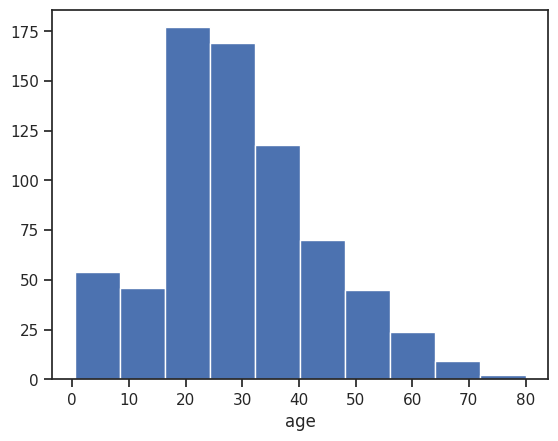

In [68]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df_titanic[col], 10)
    plt.xlabel(col)
    plt.show()

In [ ]:
# Будем использовать встроенные средства импьютации библиотеки scikit-learn
data_num_age = data_num[['age']]

# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_age)

In [77]:
 # Различные способы импьютации
strategies = ['mean', 'median', 'most_frequent']

def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_age)
    return data_num_imp[mask_missing_values_only]

In [ ]:
strategies[0], test_num_impute(strategies[0]) # среднее значение

In [ ]:
strategies[1], test_num_impute(strategies[1]) # медиана

In [ ]:
strategies[2], test_num_impute(strategies[2]) # часто повторяющееся

In [98]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [ ]:
df_titanic[['age']].describe()

In [99]:
test_num_impute_col(df_titanic, 'age', strategies[0]) # среднее значение

('age', 'mean', 177, 29.69911764705882, 29.69911764705882)

In [100]:
test_num_impute_col(df_titanic, 'age', strategies[1]) # медиана

('age', 'median', 177, 28.0, 28.0)

In [101]:
test_num_impute_col(df_titanic, 'age', strategies[2]) # часто повторяющееся

('age', 'most_frequent', 177, 24.0, 24.0)

##### Обработка пропусков в категориальных данных

In [111]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and dt == 'object':
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Количество пустых значений {}, {}%.'.format(col, temp_null_count, temp_perc))

Колонка 2ND_MOST_STREAMED_GAME. Количество пустых значений 77, 7.71%.


In [113]:
sec_game_df = data[['2ND_MOST_STREAMED_GAME']]
sec_game_df.head()

,2ND_MOST_STREAMED_GAME
0,I'm Only Sleeping
1,NBA 2K20
2,I'm Only Sleeping
3,Just Chatting
4,League of Legends


In [ ]:
sec_game_df['2ND_MOST_STREAMED_GAME'].unique()

In [158]:
sec_game_df[sec_game_df['2ND_MOST_STREAMED_GAME'].isnull()].shape

(77, 1)

In [ ]:
# Импьютация наиболее частыми значениями
method_imp = 'most_frequent'
imp2 = SimpleImputer(missing_values=np.nan, strategy=method_imp)
data_imp2 = imp2.fit_transform(sec_game_df)
data_imp2

In [ ]:
# Пустые значения отсутствуют
np.unique(data_imp2)

In [ ]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(sec_game_df)
data_imp3

In [162]:
'NA' in np.unique(data_imp3)

True

In [166]:
data_imp3[data_imp3=='NA'].size

77

#### Преобразование категориальных признаков в числовые

Кодирование категорий целочисленными значениями (label encoding)


1.   LabelEncoder
2.   OrdinalEncoder



In [ ]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

##### Использование OrdinalEncoder

In [ ]:
data_oe = data[['DAY_WITH_MOST_FOLLOWERS_GAINED', 'MOST_ACTIVE_DAY', 'MOST_STREAMED_GAME', '2ND_MOST_STREAMED_GAME', 'LANGUAGE', 'TYPE']]
data_oe.head()

In [ ]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

In [ ]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

In [177]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4., 5., 6.])

In [178]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0., 1., 2., 3., 4., 5., 6.])

In [ ]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

In [ ]:
# Уникальные значения 4 признака
np.unique(cat_enc_oe[:, 3])

In [181]:
# Уникальные значения 5 признака
np.unique(cat_enc_oe[:, 4])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18.])

In [182]:
# Уникальные значения 6 признака
np.unique(cat_enc_oe[:, 5])

array([0., 1.])

In [ ]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

In [186]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Saturday', 'Friday', 'Just Chatting', "I'm Only Sleeping",
        'English', 'personality'],
       ['Sunday', 'Tuesday', "Tom Clancy's Rainbow Six Siege",
        'NBA 2K20', 'English', 'personality'],
       ['Sunday', 'Thursday', 'League of Legends', "I'm Only Sleeping",
        'English', 'personality'],
       ...,
       ['Thursday', 'Thursday', 'Virtual Casino', 'Slots', 'Portuguese',
        'personality'],
       ['Monday', 'Tuesday', 'Apex Legends', 'Z1: Battle Royale',
        'English', 'personality'],
       ['Sunday', 'Tuesday', 'Minecraft', 'Just Chatting', 'English',
        'personality']], dtype=object)

##### Использование LabelEncoder

In [ ]:
cat_enc['c1'].unique()

In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [ ]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем
# задачу классификации и каждое значение категории соответствует
# какому-либо классу целевого признака

le.classes_

In [ ]:
cat_enc_le

In [ ]:
np.unique(cat_enc_le)

#### Кодирование категорий наборами бинарных значений - one-hot encoding

In [204]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

cat_enc_ohe.shape # 178 разных игр (каждое уникальное значение признака становится новым отдельным признаком)

(999, 178)

In [203]:
cat_enc.shape

(999, 1)

##### Pandas get_dummies - быстрый вариант one-hot кодирования

In [ ]:
pd.get_dummies(cat_enc).head()

In [ ]:
pd.get_dummies(sec_game_df, dummy_na=True).head()

#### Масштабирование данных

In [ ]:
sc1 = MinMaxScaler() # приводит значения к диапазону [0, 1]
sc1_data = sc1.fit_transform(data[['FOLLOWERS_GAINED_PER_STREAM']])

In [ ]:
plt.hist(data['FOLLOWERS_GAINED_PER_STREAM'], 50)
plt.show()

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

##### Масштабирование данных на основе Z-оценки - StandardScaler

In [218]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['FOLLOWERS_GAINED_PER_STREAM']])

In [ ]:
plt.hist(sc2_data, 50)
plt.show()